In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
img = Image.open('data/376 padded.bmp').convert("L")
img.load()
data = np.asarray(img, dtype="int32")

print(data.shape)

(28, 140)


In [3]:
def relu(x):
    return (x > 0) * x

weights_0_1 = np.loadtxt('weights_0_1.txt')
weights_1_2 = np.loadtxt('weights_1_2.txt')

input_height, input_width = (data.shape[0], data.shape[1])

In [4]:
outputs = []
layer_2s = []
for i in range(input_width - 27):
    layer_0 = data[0:28, i:i+28]
    layer_0 = layer_0.reshape(1, 784)
    layer_0 = layer_0 / 255
    layer_1 = relu(layer_0.dot(weights_0_1))
    layer_2 = layer_1.dot(weights_1_2)
    
    output = np.max(layer_2)
    outputs.append(output)
    layer_2s.append(layer_2)
    
print(outputs)

[0.032133438391671064, 0.02228914095158614, 0.03130917400493738, 0.032276420530290235, 0.024766067924524054, 0.04152541368102281, 0.14033863299287533, 0.28435900407549425, 0.40963356066593226, 0.5938522323401921, 0.8478619013395639, 0.8811054167578638, 0.7598805505473228, 0.7716541621257514, 0.9956678311455474, 0.9949835550643173, 0.9093434927523336, 0.7306037327156278, 0.8294275477494791, 0.7480891763840439, 0.6860473048167126, 0.4421797183112659, 0.34740426156928794, 0.300797125239955, 0.5002815699109254, 0.680226946999212, 0.9343212913418614, 0.939030852426358, 0.893251621945078, 0.8184677821886017, 0.6216573883452166, 0.44172734901555516, 0.3616209704201878, 0.44694081760228255, 0.5807226855357308, 0.48429036295861727, 0.7062958073166747, 0.6346636256549033, 0.8243887214918919, 0.8858387706866395, 0.8896782581486171, 0.8509864289523333, 1.112141472586503, 0.9237656856297594, 0.9265321716701471, 0.6436899129500266, 0.6685136870526304, 0.7330660242105701, 0.5604811182240131, 0.539471

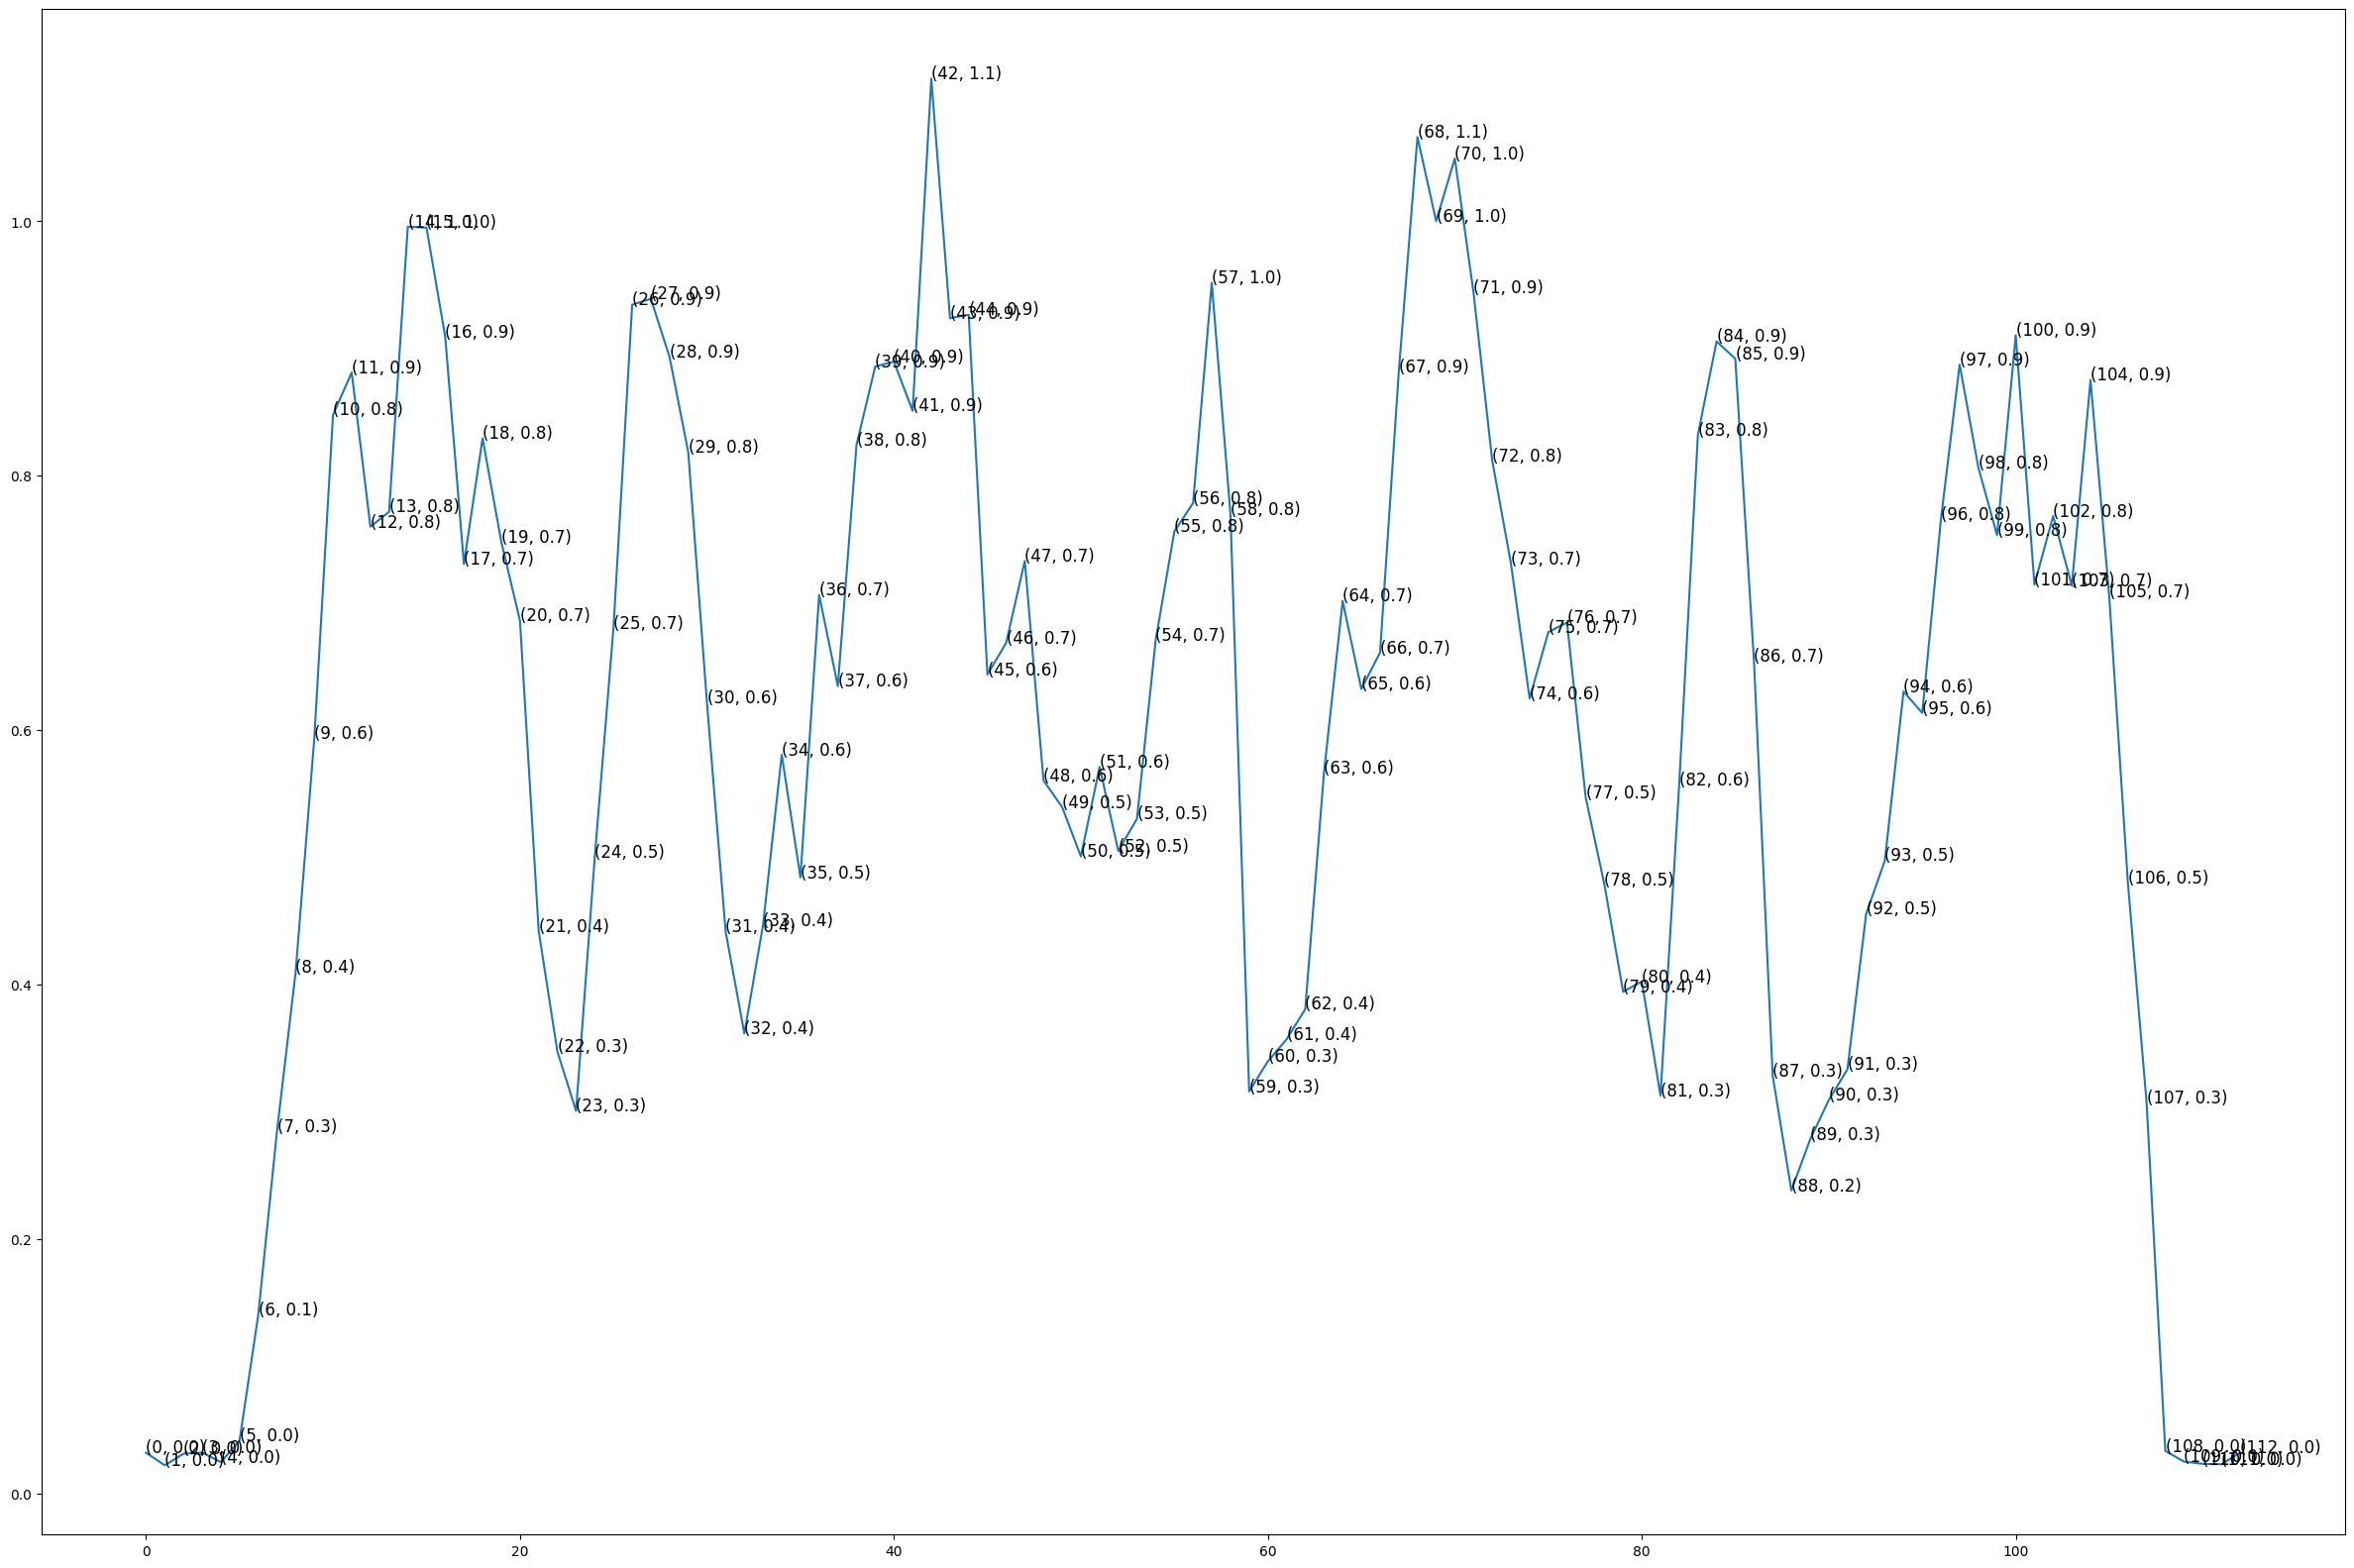

In [5]:
indices = np.arange(0,len(outputs))
outputs = np.array(outputs)

plt.figure(figsize=(30,20))
ax = plt.subplot()
plt.plot(indices, outputs)
for x, y in zip(indices, outputs):
    ax.text(x,y, f'({x}, {round(y,1)})', fontsize=12)

In [6]:
print(np.argmax(layer_2s[8]))

5


0 0.39124352983163835
1 0.45543353760981475
2 0.5145704943965314
3 0.5611901316439106
4 0.6143335401251898
5 0.6625550806891578
6 0.7055232067648703
7 0.7256459457860965
8 0.7298489629523495
9 0.7225932005906176
10 0.7163551564286664
11 0.7051794928059765
12 0.7087272177782429
13 0.7206705712368452
14 0.7287770685581337
15 0.7169637319610039
16 0.6920753208463973
17 0.6609009112639453
18 0.6363020604442492
19 0.6108029451011028
20 0.5996451790445487
21 0.5861947162540091
22 0.6038024555210363
23 0.6229530797934106
24 0.6578591862102066
25 0.6835629995952542
26 0.6975264203385478
27 0.6919707628459125
28 0.7035114708565889
29 0.705545741768901
30 0.7127500344010039
31 0.714218869374658
32 0.7293379585771296
33 0.7541009621631551
34 0.7616703155379373
35 0.7589202603044226
36 0.7600166481720685
37 0.7510066504796239
38 0.7423720658118659
39 0.7227730288153289
40 0.708436880429781
41 0.6995408129522712
42 0.6947095657047879
43 0.6840089697921375
44 0.6737307225494216
45 0.6330366511266425

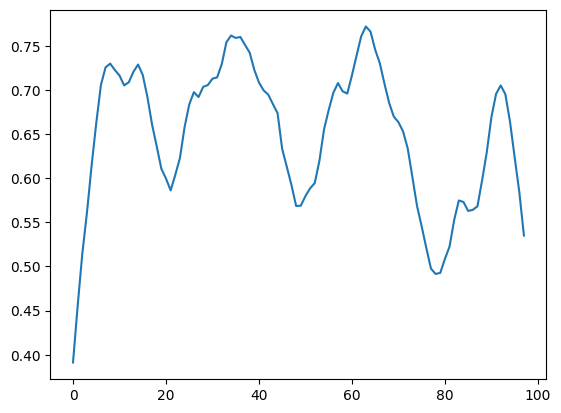

In [7]:
averages = []

for i in range(len(outputs) - 15):
    average = np.average(outputs[i:i+15])
    print(i, average)
    averages.append(average)
    
print(len(averages))
print(len(outputs))
indices = np.arange(0, len(averages))
plt.plot(indices, averages)
print()

(28, 107)


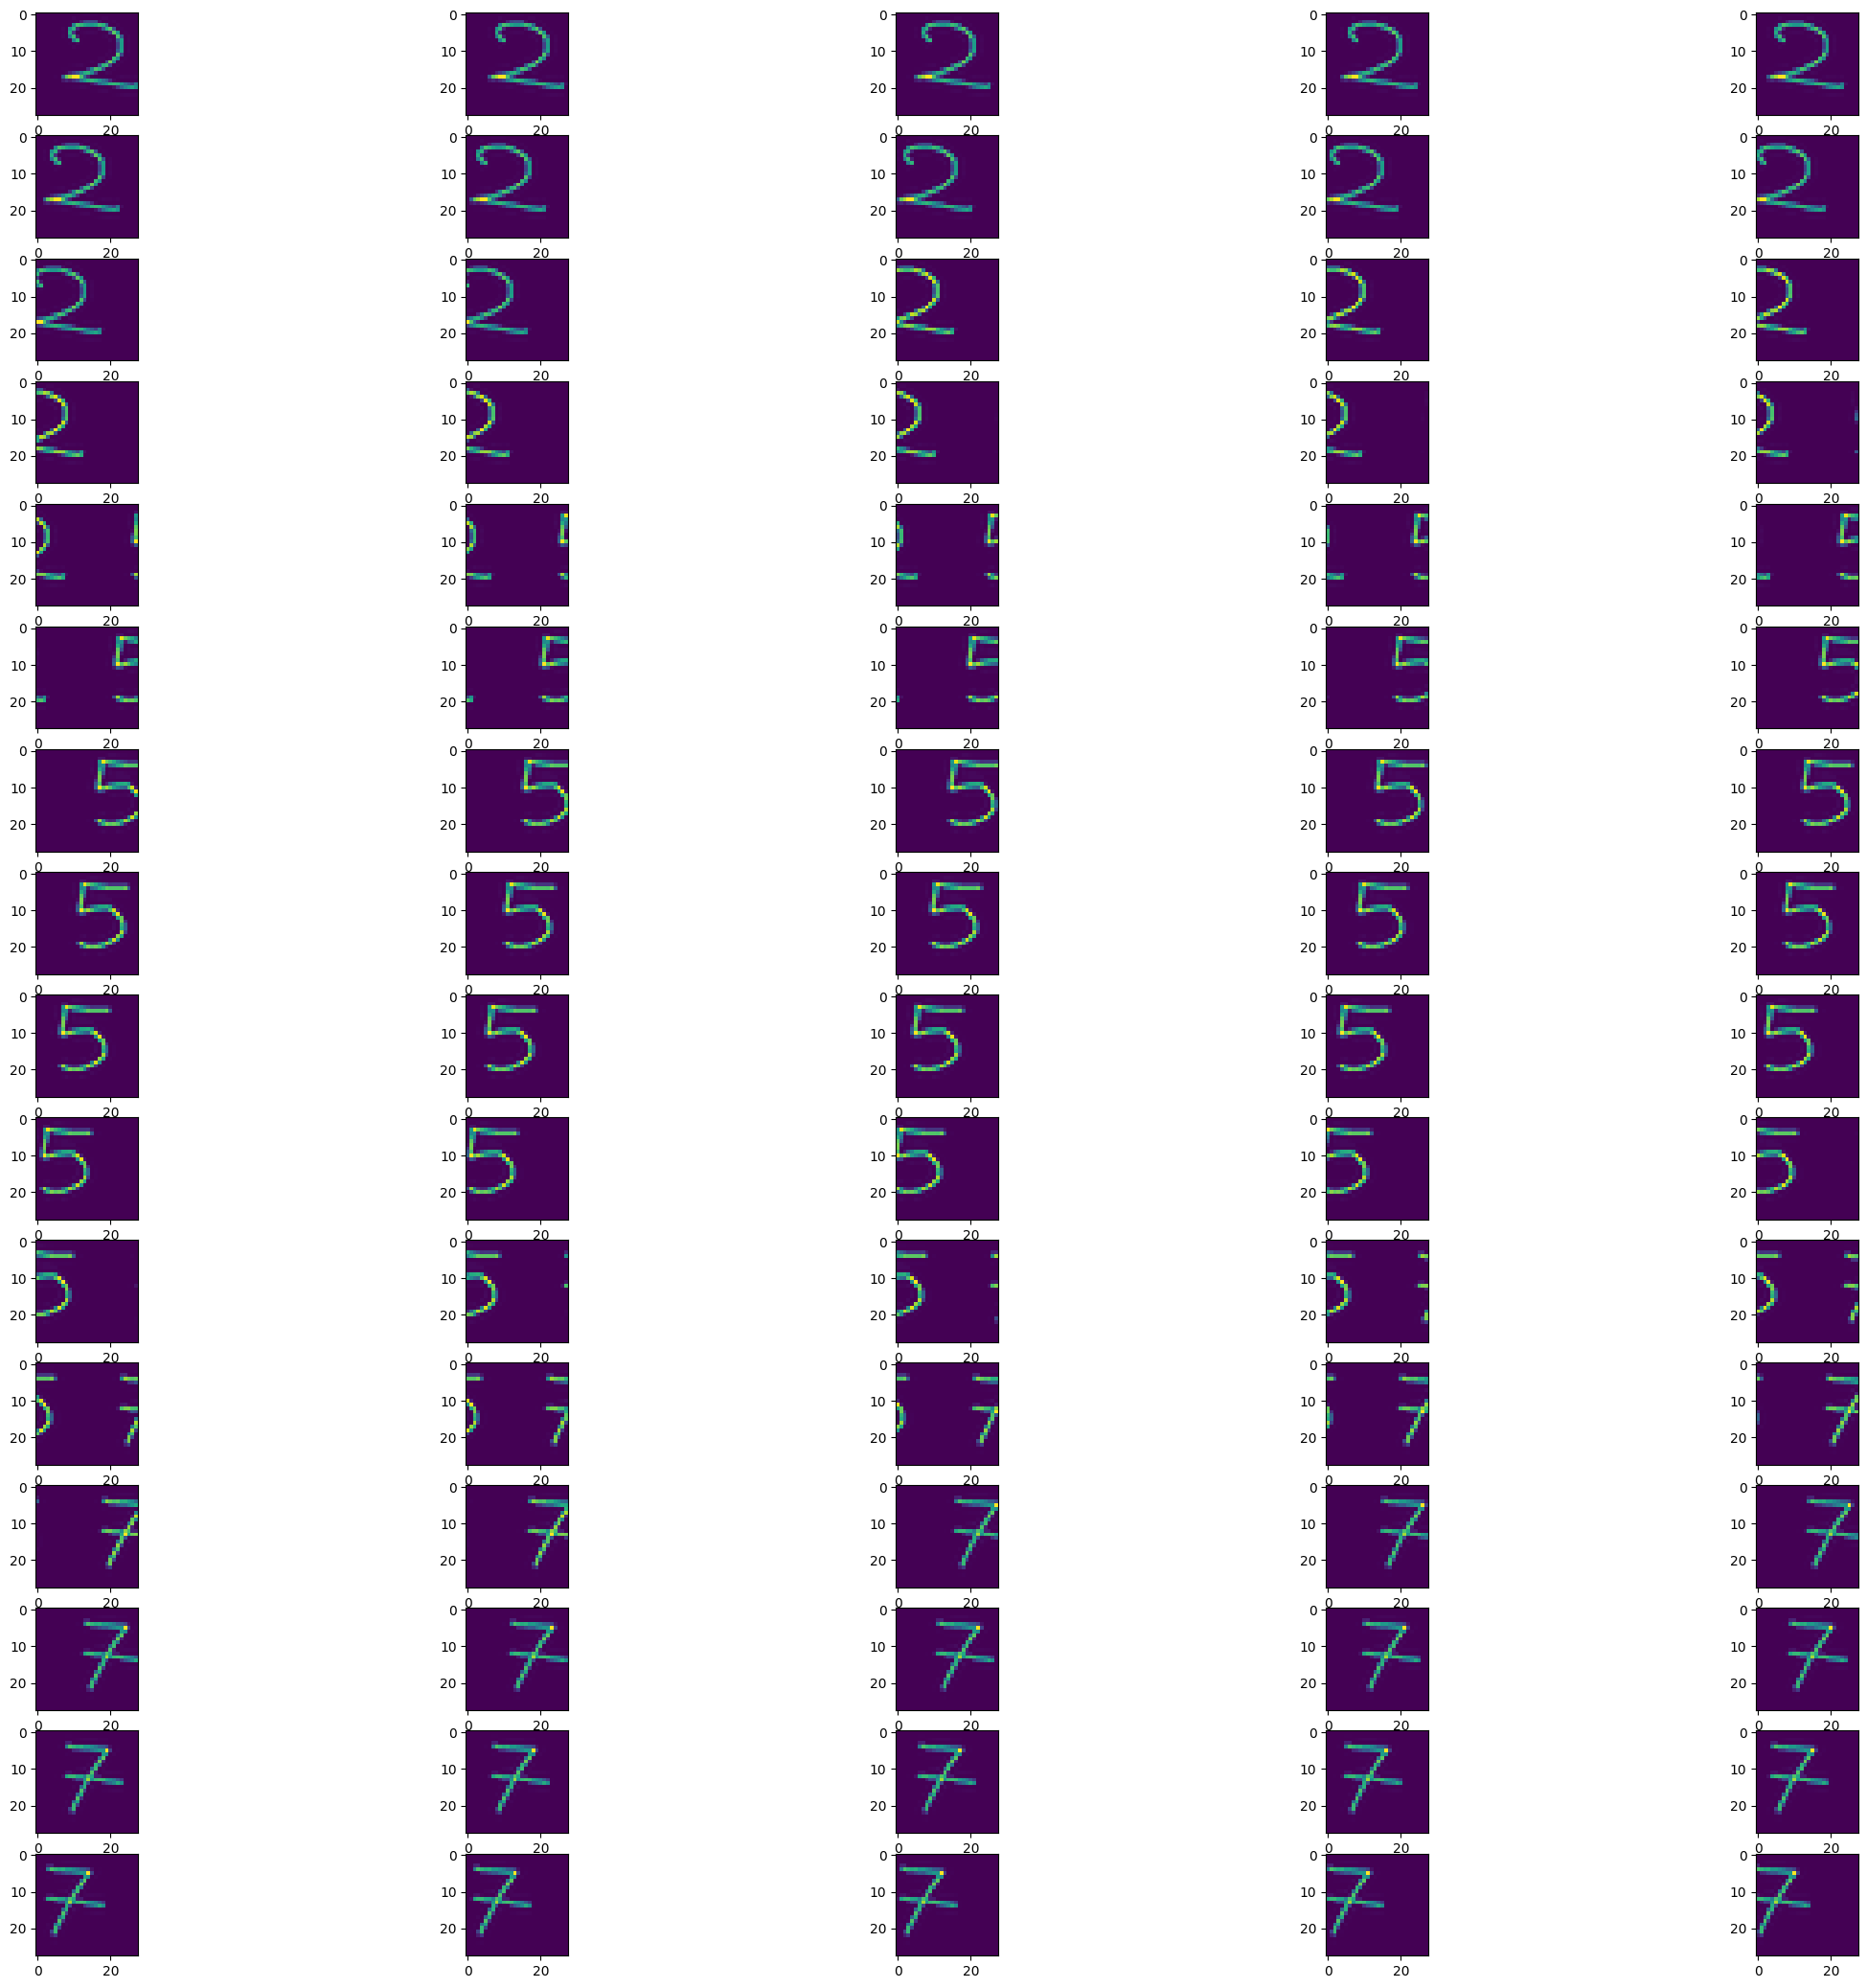

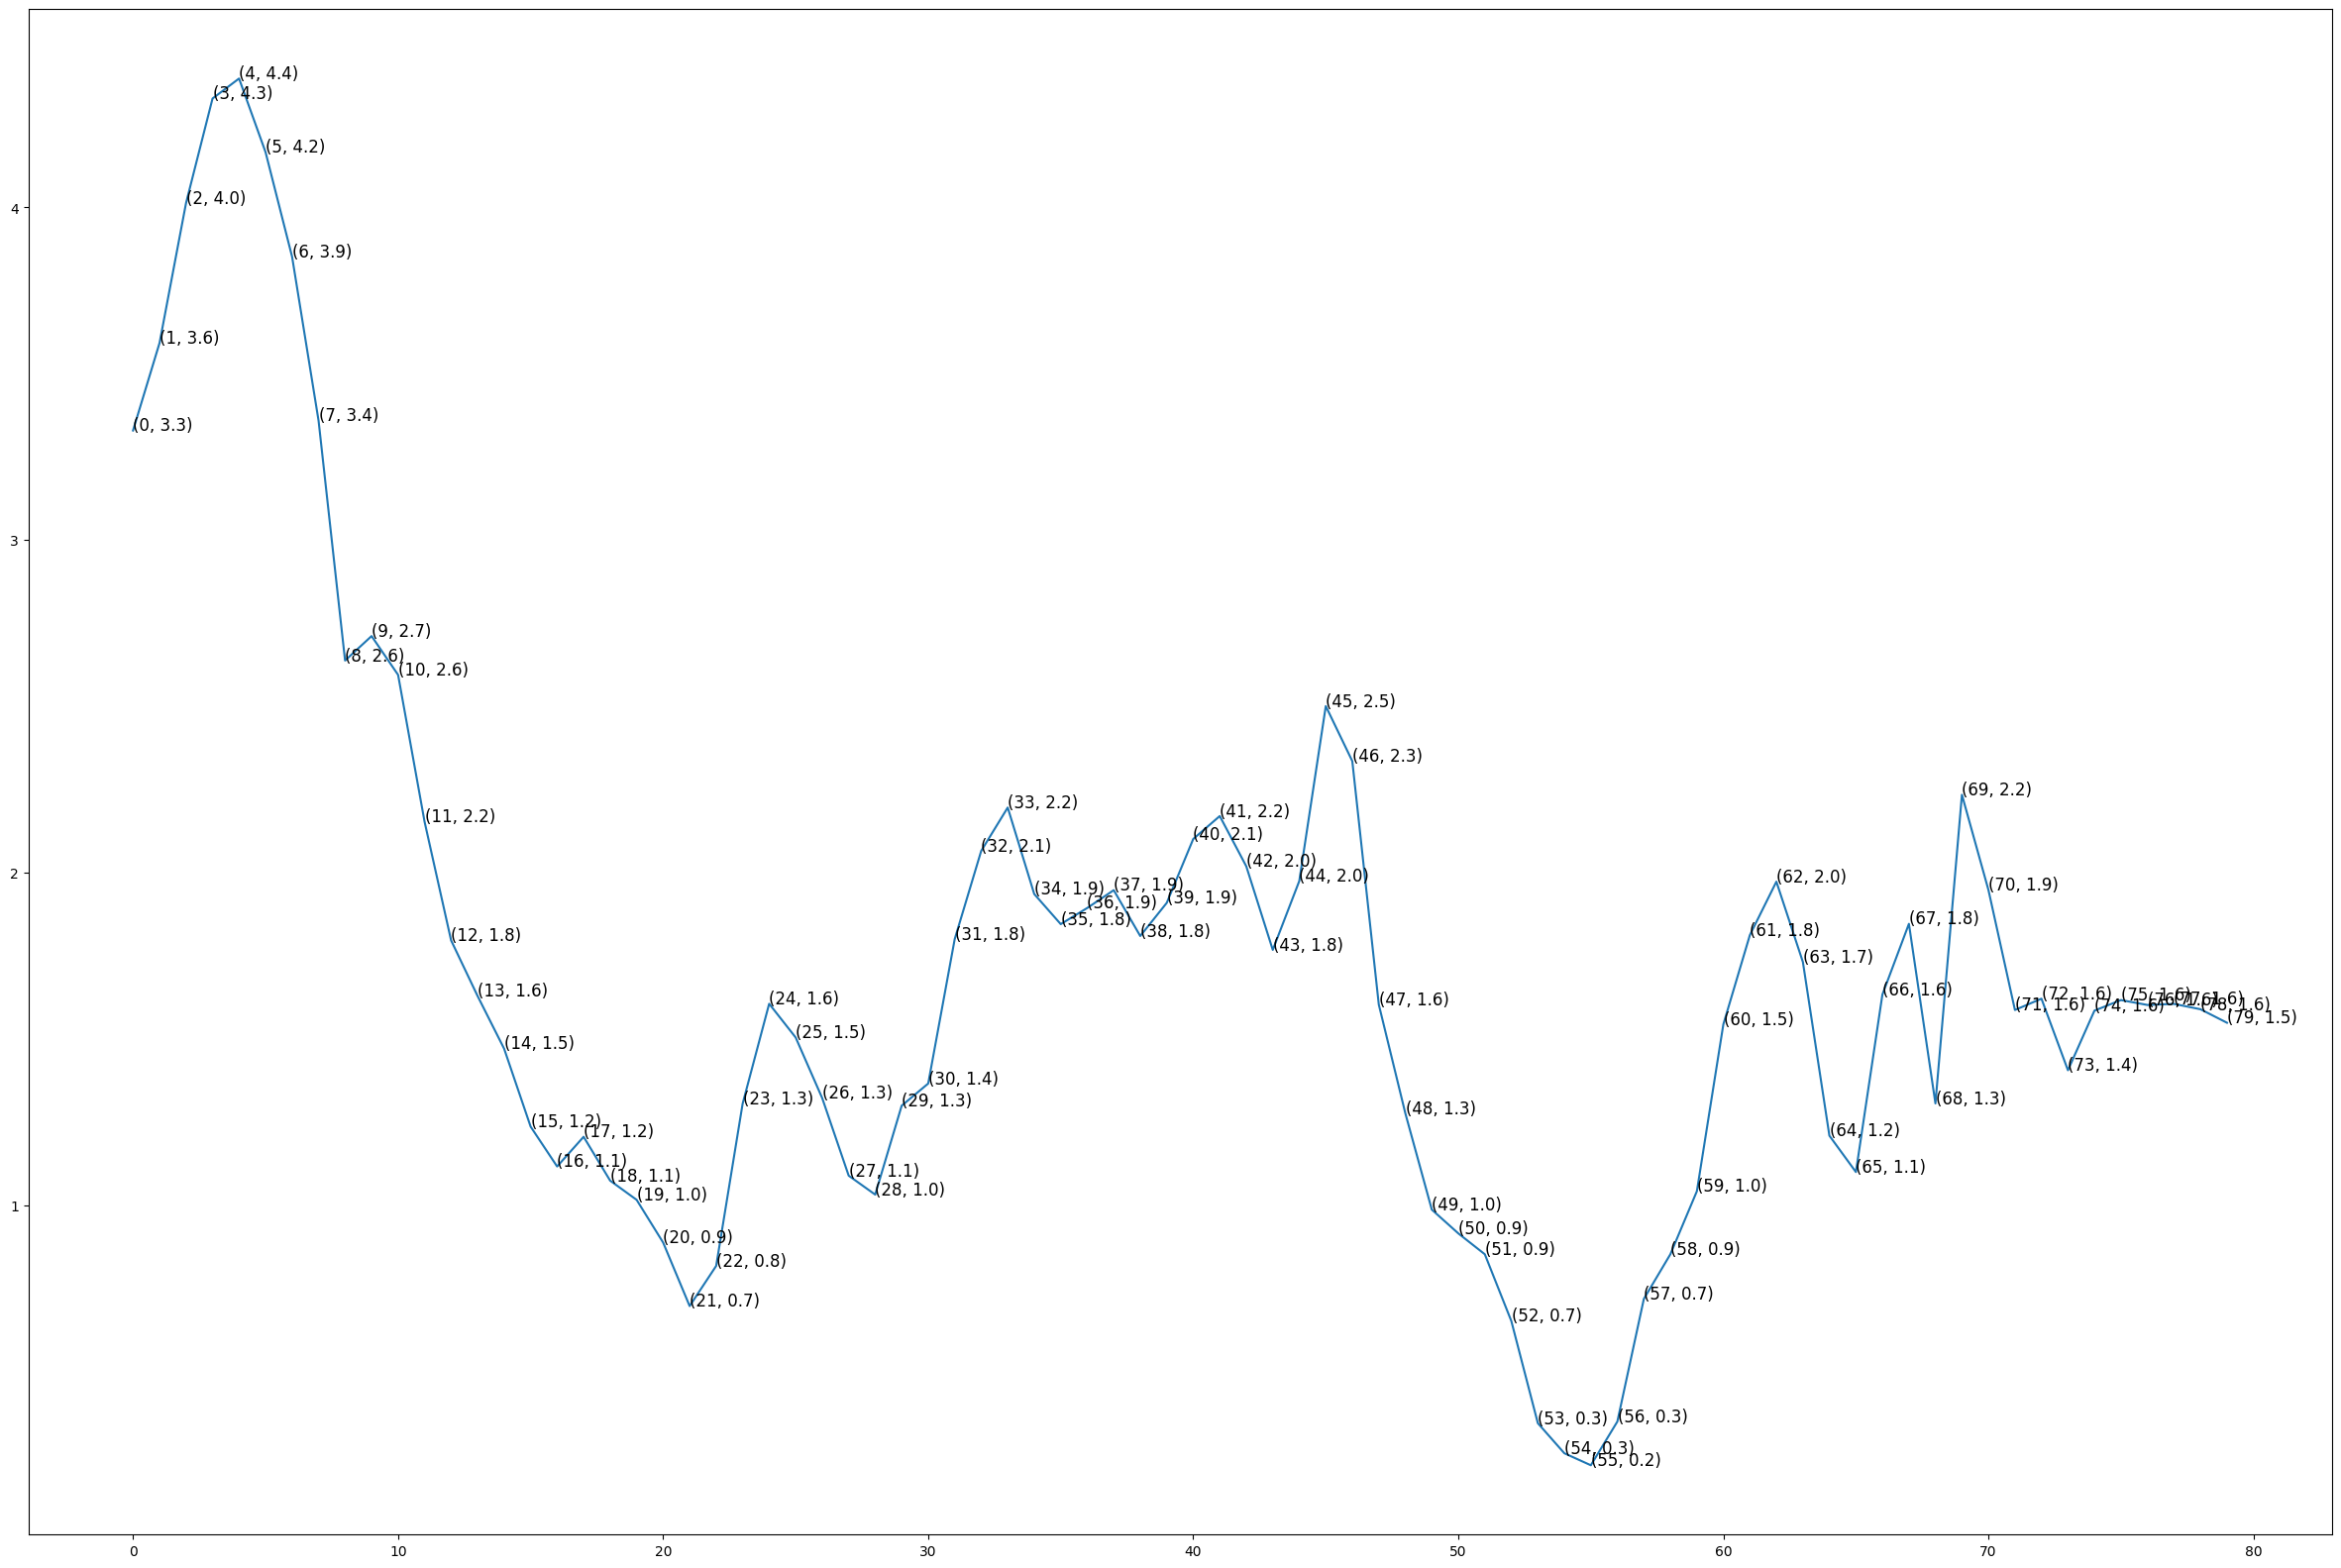

In [8]:
img = Image.open('data/3 digit test.bmp').convert("L")
img.load()
data = np.asarray(img, dtype="int32")

print(data.shape)

def tanh(x):
    return np.tanh(x)

weights_0_1 = np.load('w_0_1.npy')
weights_1_2 = np.load('w_1_2.npy')
input_height, input_width = (data.shape[0], data.shape[1])

outputs = []
img_list = []
fig = plt.figure(figsize=(28, 28))
for i in range(input_width - 27):
    layer_0 = data[0:28, i:i+28]
    img_list.append(layer_0)
    layer_0 = layer_0.reshape(1, 784)
    layer_0 = layer_0 / 255
    layer_1 = tanh(layer_0.dot(weights_0_1))
    layer_2 = layer_1.dot(weights_1_2)
    
    output = np.max(layer_2)
    outputs.append(output)
    
columns = 5
rows = int(len(img_list)/columns) + 1
for i in range(1, len(img_list) + 1):
    img = img_list[i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    
indices = np.arange(0, len(outputs))
outputs = np.array(outputs)

plt.figure(figsize=(30,20))
ax = plt.subplot()
plt.plot(indices, outputs)
for x, y in zip(indices, outputs):
    ax.text(x,y, f'({x}, {round(y,1)})', fontsize=12)
plt.show()

In [9]:
layer_0 = data[0:28, 13:41]
layer_0 = layer_0.flatten() / 255
layer_1 = tanh(layer_0.dot(weights_0_1))
layer_2 = layer_1.dot(weights_1_2)
print(layer_2)

[ 1.34604616 -1.68114931  0.70857179 -1.11654133 -0.60131773  1.62888786
  1.48307495 -0.96053585  0.59799556 -1.45302942]


In [10]:
def get_image_section(layer, row_from, row_to, col_from, col_to):
    section = layer[:, row_from:row_to, col_from:col_to]
    return section.reshape(-1, 1, row_to - row_from, col_to - col_from)

def tanh(x):
    return np.tanh(x)

img = Image.open('data/472 padded.bmp').convert("L")
img.load()
data = np.asarray(img, dtype="int32")

kernel_rows = 3
kernel_cols = 3
num_kernels = 16

kernels = np.load('cnn_kernels.npy')
weights_1_2 = np.load('cnn_w_1_2.npy')
input_height, input_width = (data.shape[0], data.shape[1])

outputs = []
layer_2s = []
for i in range(input_width - 27):
    layer_0 = data[0:28, i:i+28]
    layer_0.reshape(1,784)
    layer_0 = layer_0.reshape(1, 28, 28)
    layer_0 = layer_0 / 255

    sects = list()
    for row_start in range(layer_0.shape[1] - kernel_rows):
        for col_start in range(layer_0.shape[2] - kernel_cols):
            sect = get_image_section(layer_0, 
                                        row_start, row_start + kernel_rows, 
                                        col_start, col_start + kernel_cols)
            sects.append(sect)

    expanded_input = np.concatenate(sects, axis=1)
    es = expanded_input.shape
    flattened_input = expanded_input.reshape(es[0] * es[1], -1)

    kernel_output = flattened_input.dot(kernels)

    layer_1 = tanh(kernel_output.reshape(es[0], -1))
    layer_2 = np.dot(layer_1, weights_1_2)
    outputs.append(np.max(layer_2))
    layer_2s.append(layer_2)
    


[1.01301884e-03 9.83773679e-04 2.74915877e-02 1.00953570e-01
 1.65710993e-01 7.28766141e-01 1.49915396e+00 2.29420202e+00
 3.09068001e+00 3.52796952e+00 3.57140120e+00 3.34693218e+00
 3.62606310e+00 3.31377161e+00 2.45825714e+00 2.26329160e+00
 2.60173891e+00 3.99613680e+00 5.77725934e+00 7.22458961e+00
 7.35550983e+00 6.84194898e+00 7.56631378e+00 7.69816054e+00
 6.88413642e+00 5.19478111e+00 2.84291606e+00 2.37924644e+00
 4.02812487e+00 4.16050087e+00 4.95448292e+00 6.23043868e+00
 6.50038827e+00 7.59977028e+00 8.09932993e+00 8.54173469e+00
 9.14253919e+00 1.04621873e+01 1.08357267e+01 1.03058434e+01
 9.60044390e+00 9.56908640e+00 8.86955773e+00 7.34902071e+00
 6.48845681e+00 6.04449663e+00 6.35026029e+00 6.10544863e+00
 6.34549950e+00 6.68517113e+00 6.58659760e+00 4.86805488e+00
 6.27297690e+00 8.78429188e+00 1.11854487e+01 1.27887507e+01
 1.30041145e+01 1.15235193e+01 7.66802581e+00 5.48312339e+00
 6.86006453e+00 7.27743032e+00 6.44799604e+00 5.08368518e+00
 3.93816402e+00 3.787819

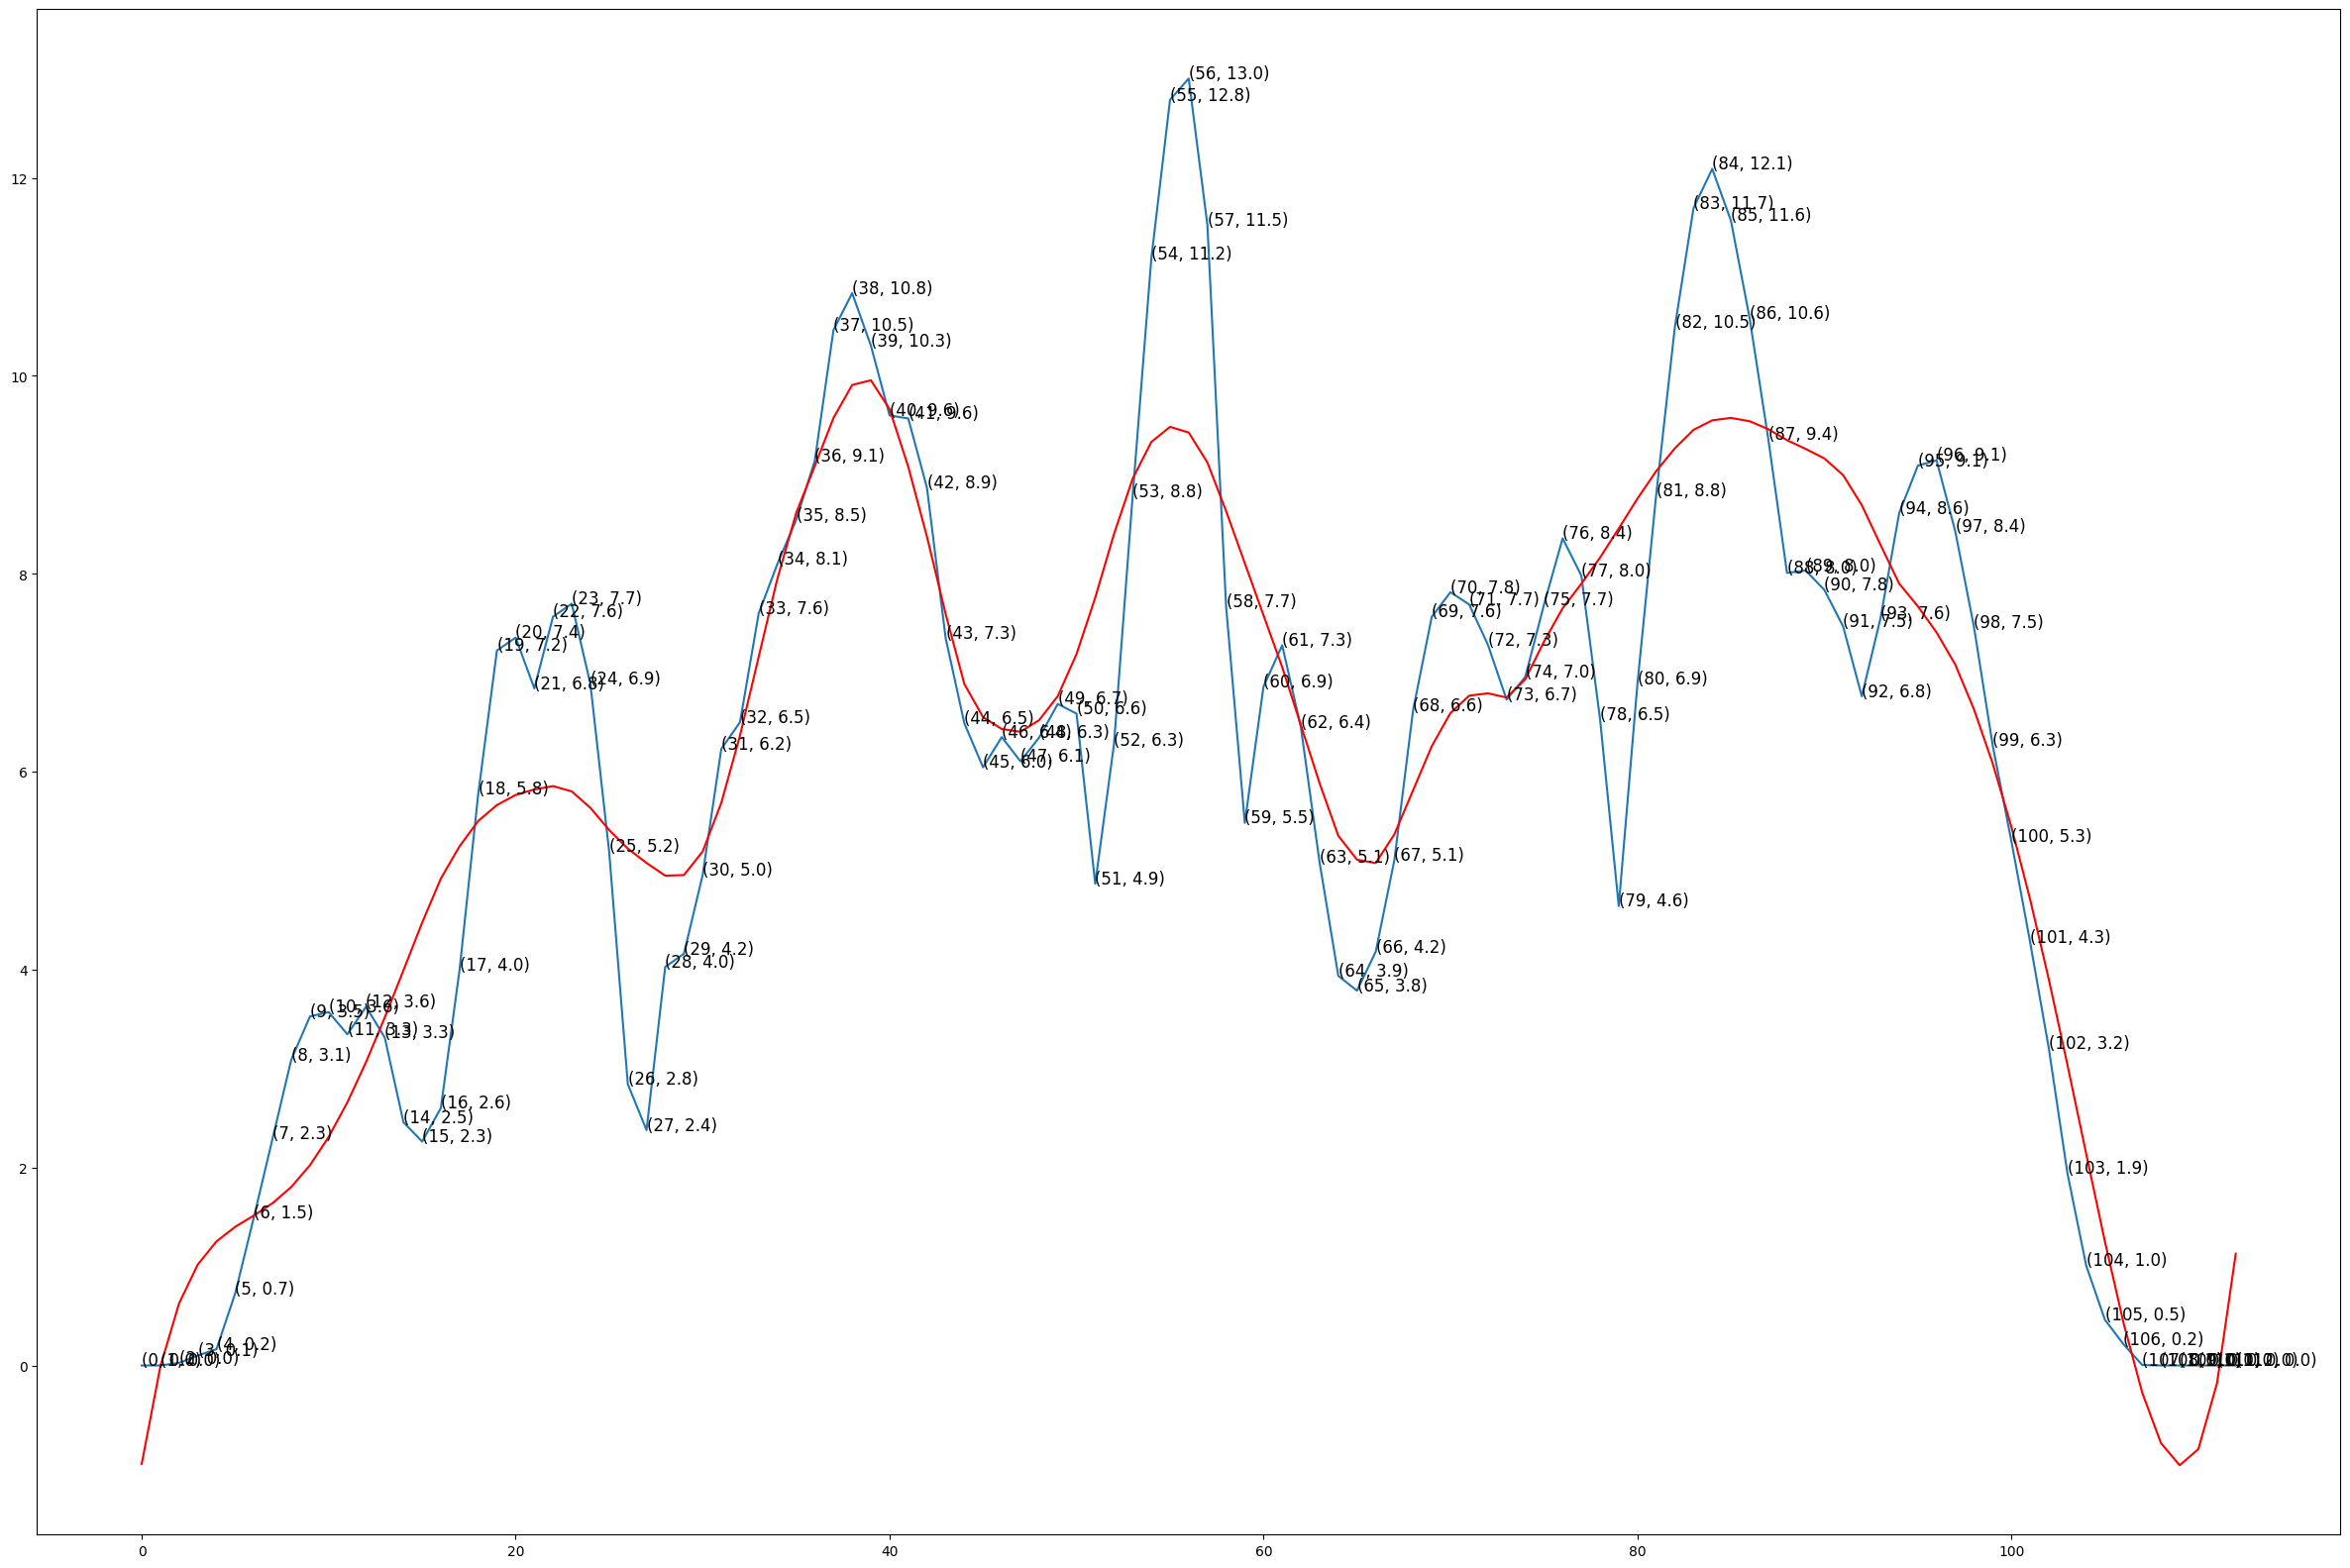

In [11]:
indices = np.arange(0,len(outputs))
outputs = np.array(outputs)

print(outputs)

plt.figure(figsize=(30,20))
ax = plt.subplot()
plt.plot(indices, outputs)
for x, y in zip(indices, outputs):
    ax.text(x,y, f'({x}, {round(y,1)})', fontsize=12)

yhat = savgol_filter(outputs, 31, 5)
plt.plot(indices, yhat, color='red')

In [12]:
print(np.argmax(layer_2s[31]))
print(np.argmax(layer_2s[48]))
print(np.argmax(layer_2s[81]))

8
2
2


9.225362593628386


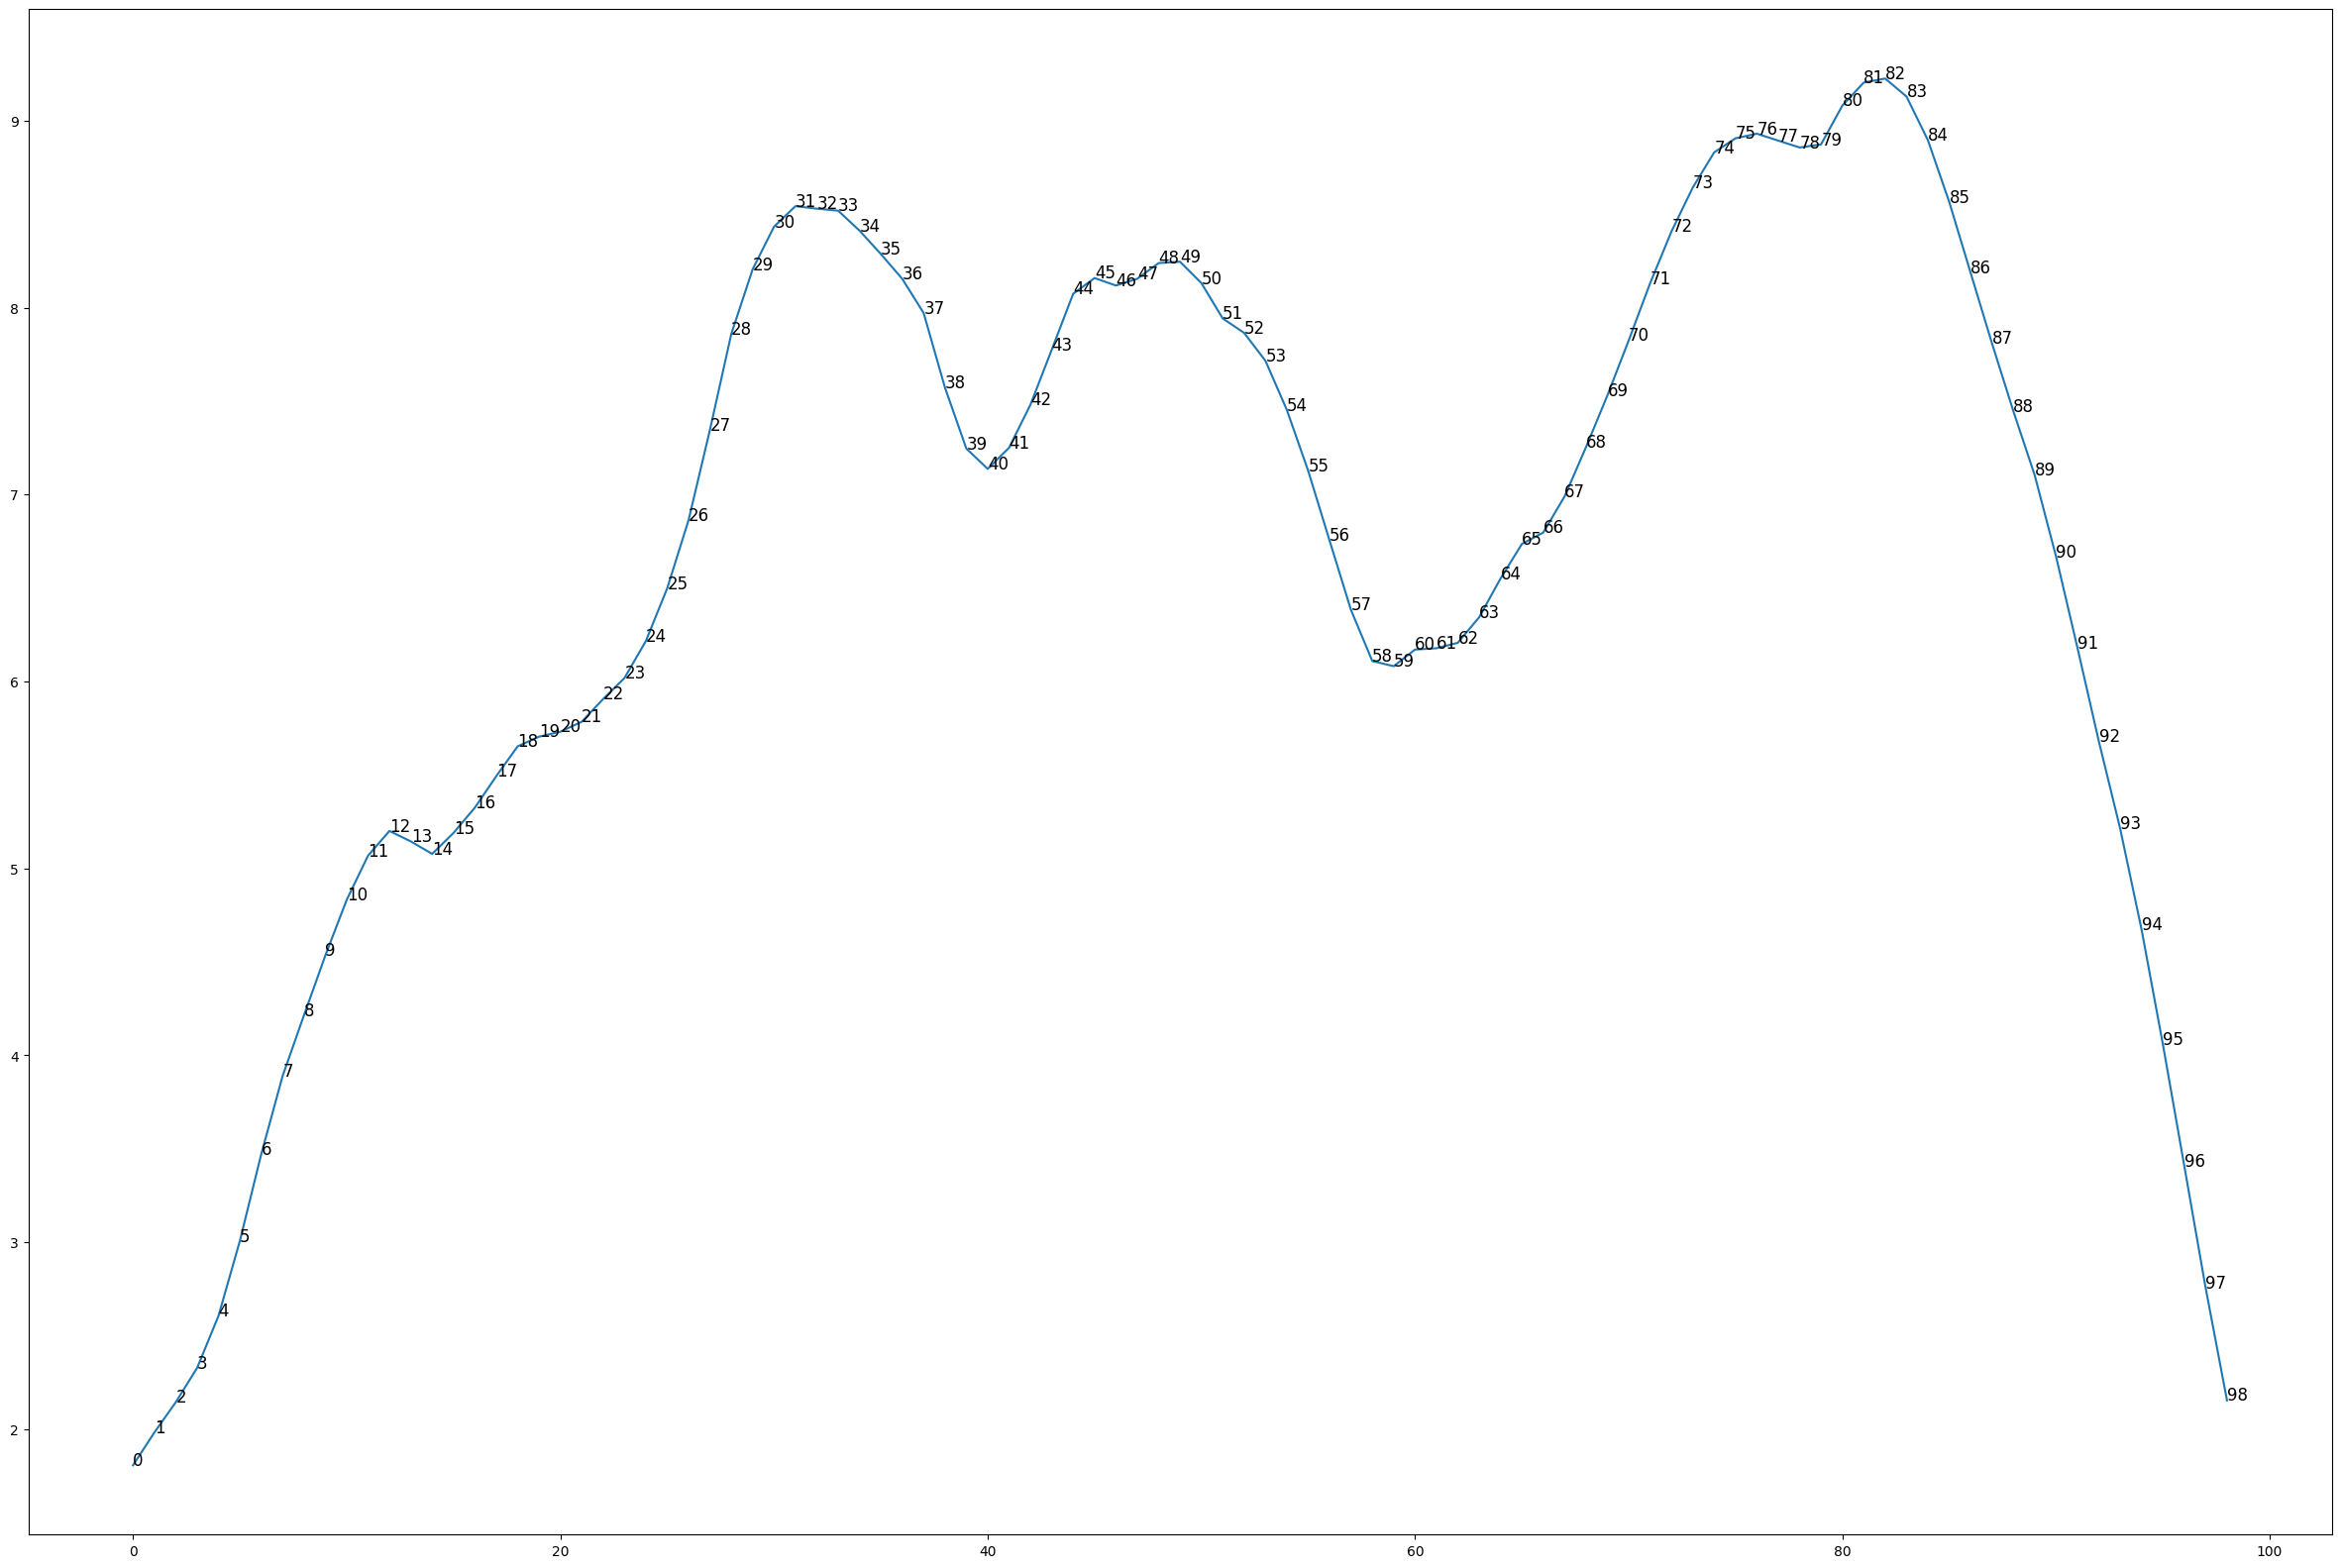

In [13]:
averages = []

for i in range(len(outputs) - 14):
    averages.append(np.average(outputs[i:i+14]))
    
print(averages[82])
indices = np.arange(0, len(averages))

plt.figure(figsize=(30, 20))
plt.plot(indices, averages)
ax = plt.subplot()
for x, y in zip(indices, averages):
    ax.text(x, y, f'{x}', fontsize=12)

In [274]:
# SAMPLES GENERATION

import os, random

x_path = "x_sample"
y_path = "y_sample"

padding_path = "d:\\MNIST images\\padding.bmp"
training_set_path = "d:\\MNIST images\\trainingSet\\trainingSet"

x_test = list()
y_test = list()
for i in range(1000):
    # left padding
    image = Image.open(padding_path).convert("L")
    image.load()
    sample = np.asarray(image, dtype="int32")
    
    # randomly append 3 digits
    label = 0
    for j in range(3):
    # take random digits image from mnist samples
        rand_digit = random.randint(0,9)
        label += rand_digit * pow(10, 2 - j)
        image = Image.open(training_set_path + f"\\{rand_digit}\\" + str(random.choice(os.listdir(training_set_path + f"\\{rand_digit}\\"))))
        image.load()
        sample = np.append(sample, np.asarray(image, dtype="int32"), axis=1)
        
    # right padding
    image = Image.open(padding_path).convert("L")
    image.load()
    sample = np.append(sample, np.asarray(image, dtype="int32"), axis=1)
    
    # reshape to 2d array and append to list
    sample = sample.reshape(28, -1)
    x_test.append(sample)
    y_test.append(label)
    
np.save("x_test", x_test)
np.save("y_test", y_test)


In [180]:
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

print(x_test[0].shape)

(28, 140)


In [268]:
# CALCULATE EMPTY_COEFFICIENTS (NOISE_PIXELS/TOTAL_PIXEL)
# OF AN IMAGE

def get_empty_coefficients_of_image(img):
    #img = Image.open('data/913 padded.bmp').convert("L")
    #img.load()
    #data = np.asarray(img, dtype="int32")

    empty_coefficients = list()

    for i in range(input_width - 27):
        # take 1 square of pixels for examine
        image = data[0:28, i:i+28]
        values, values_count = np.unique(image, return_counts=True)
        
        count_noise_and_empty = sum(values_count[i] for i in range(len(values_count)) if i < 37)
        # 37 is best value to filter out noise after testing value from 1 to 100
        
        empty_coefficient = count_noise_and_empty / (28 * 28)
        empty_coefficients.append(empty_coefficient)
        
    return empty_coefficients
    #indices = np.arange(0, len(empty_coefficients))
    #print(empty_coefficients[50:60])
    #plt.figure(figsize=(30,20))
    #plt.plot(indices, empty_coefficients)

In [269]:
def get_potential_positions(img, empty_coefficients):
    current_empty_coefficient = 1

    potential_positions = []
    count = 0
    for i in range(1, len(empty_coefficients)):
        if(np.isclose(current_empty_coefficient, empty_coefficients[i]) and current_empty_coefficient < 1):
            count += 1
        else:
            if count > 1: potential_positions.append(int(i - (count/2)))
            count = 0
        current_empty_coefficient = empty_coefficients[i]
    return potential_positions

In [281]:
# TESTING WITH HIDDEN LAYER
def get_image_section(layer, row_from, row_to, col_from, col_to):
    section = layer[:, row_from:row_to, col_from:col_to]
    return section.reshape(-1, 1, row_to - row_from, col_to - col_from)

def tanh(x):
    return np.tanh(x)

x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

kernel_rows = 3
kernel_cols = 3
num_kernels = 16

weights_0_1 = np.load('nn_weights_0_1.npy')
weights_1_2 = np.load('nn_weights_1_2.npy')
input_height, input_width = (data.shape[0], data.shape[1])

correct_cnt = 0
for index in range(1000):
    image = x_test[index]
    outputs = []
    empty_coefficients = get_empty_coefficients_of_image(image)
    potential_positions = get_potential_positions(image, empty_coefficients)
    for i in potential_positions:
        layer_0 = image[0:28, i:i+28]
        layer_0 = layer_0.reshape(1, 784)
        layer_0 = layer_0 / 255
        layer_1 = relu(layer_0.dot(weights_0_1))
        layer_2 = layer_1.dot(weights_1_2)
        
        outputs.append(np.argmax(layer_2))
        
    output_integer = 0
    exp = 0
    for i in range(len(outputs) - 1, -1, -1):
        output_integer += outputs[i] * pow(10, exp)
        exp += 1
    label = y_test[index]
    correct_cnt += output_integer == label

print(" Accuracy:" + str(correct_cnt/float(len(x_test))))

 Accuracy:0.975


In [279]:
# TESTING WITH CONVULUTION LAYER
def get_image_section(layer, row_from, row_to, col_from, col_to):
    section = layer[:, row_from:row_to, col_from:col_to]
    return section.reshape(-1, 1, row_to - row_from, col_to - col_from)

def tanh(x):
    return np.tanh(x)

x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

kernel_rows = 3
kernel_cols = 3
num_kernels = 16

kernels = np.load('cnn_kernels.npy')
weights_1_2 = np.load('cnn_w_1_2.npy')
input_height, input_width = (data.shape[0], data.shape[1])

correct_cnt = 0
for index in range(1000):
    image = x_test[index]
    outputs = []
    empty_coefficients = get_empty_coefficients_of_image(image)
    potential_positions = get_potential_positions(image, empty_coefficients)
    for i in potential_positions:
        layer_0 = image[0:28, i:i+28]
        layer_0.reshape(1,784)
        layer_0 = layer_0.reshape(1, 28, 28)
        layer_0 = layer_0 / 255

        sects = list()
        for row_start in range(layer_0.shape[1] - kernel_rows):
            for col_start in range(layer_0.shape[2] - kernel_cols):
                sect = get_image_section(layer_0, 
                                            row_start, row_start + kernel_rows, 
                                            col_start, col_start + kernel_cols)
                sects.append(sect)

        expanded_input = np.concatenate(sects, axis=1)
        es = expanded_input.shape
        flattened_input = expanded_input.reshape(es[0] * es[1], -1)

        kernel_output = flattened_input.dot(kernels)

        layer_1 = tanh(kernel_output.reshape(es[0], -1))
        layer_2 = np.dot(layer_1, weights_1_2)
        outputs.append(np.argmax(layer_2))
        
    output_integer = 0
    exp = 0
    for i in range(len(outputs) - 1, -1, -1):
        output_integer += outputs[i] * pow(10, exp)
        exp += 1
    label = y_test[index]
    correct_cnt += output_integer == label

print(" Accuracy:" + str(correct_cnt/float(len(x_test))))

 Accuracy:0.722
